## Jorge P. Rodríguez, 2023

In [1]:
import pandas as pd
import pylab as plt
plt.style.use('classic')

In [3]:
dftime = pd.read_csv('./data/time_evolution_bycategory.csv',parse_dates=['time'])
dftime.head()

,time,total(h),cargo(h),fishing(h),passenger(h),tanker(h)
0,2020-01-01,1287719.0,46606.0,711702.0,167948.0,29223.0
1,2020-02-01,1348346.0,37759.0,781424.0,165385.0,25217.0
2,2020-03-01,1534749.0,45725.0,904318.0,179381.0,28486.0
3,2020-04-01,1495143.0,44651.0,881851.0,180879.0,30601.0
4,2020-05-01,1427587.0,41483.0,803474.0,191727.0,28480.0


In [4]:
dftime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
time            28 non-null datetime64[ns]
total(h)        28 non-null float64
cargo(h)        28 non-null float64
fishing(h)      28 non-null float64
passenger(h)    28 non-null float64
tanker(h)       28 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.4 KB


/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


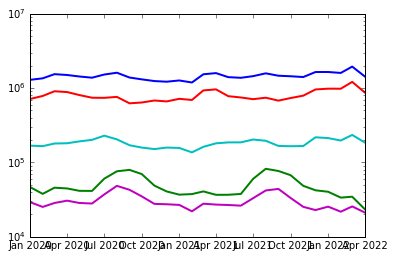

In [5]:
plt.plot(dftime['time'],dftime['total(h)'],lw=2)
plt.plot(dftime['time'],dftime['cargo(h)'],lw=2)
plt.plot(dftime['time'],dftime['fishing(h)'],lw=2)
plt.plot(dftime['time'],dftime['passenger(h)'],lw=2)
plt.plot(dftime['time'],dftime['tanker(h)'],lw=2)

plt.yscale('log')

In [6]:
cf = (0.00392156862745098, 0.45098039215686275, 0.6980392156862745)
cp = (0.792156862745098, 0.5686274509803921, 0.3803921568627451)
cc = (0.8, 0.47058823529411764, 0.7372549019607844)
ct = (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)

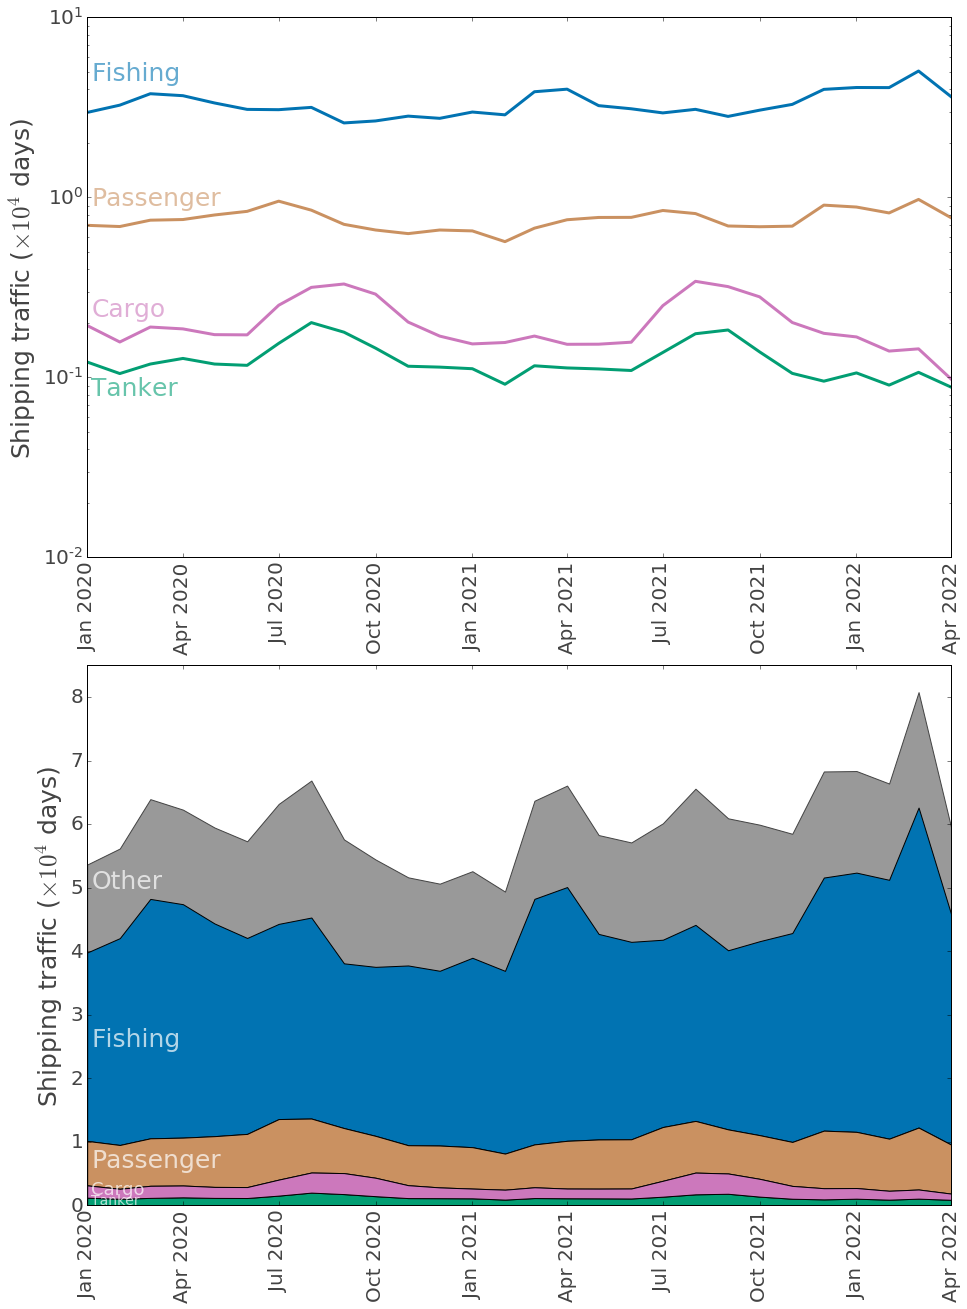

In [7]:
fig = plt.figure(figsize=(12,15))
ax = plt.gca()
ax.set_position([0.,0.6,1,0.5])
plt.plot(dftime['time'],[e1/24e4 for e1 in dftime['fishing(h)']],
         c=cf,
         lw=3)
plt.plot(dftime['time'],[e1/24e4 for e1 in dftime['passenger(h)']],c=cp,lw=3)
plt.plot(dftime['time'],[e1/24e4 for e1 in dftime['cargo(h)']],c=cc,lw=3)
plt.plot(dftime['time'],[e1/24e4 for e1 in dftime['tanker(h)']],c=ct,lw=3)

plt.xticks(rotation=90,size=20,color='#444444')
plt.yticks(size=20,color='#444444')
plt.yscale('log')
plt.ylabel(r'Shipping traffic ($\times 10^4$ days)',size=25,color='#444444')
plt.text(pd.to_datetime('2020-01-05'),4.5e0,'Fishing',size=25,color=cf,alpha=0.6)
plt.text(pd.to_datetime('2020-01-05'),9e-1,'Passenger',size=25,color=cp,alpha=0.6)
plt.text(pd.to_datetime('2020-01-05'),2.2e-1,'Cargo',size=25,color=cc,alpha=0.6)
plt.text(pd.to_datetime('2020-01-05'),8e-2,'Tanker',size=25,color=ct,alpha=0.6)

ax2 = fig.add_axes([0.,0,1,0.5])

plt.fill_between(dftime['time'],[e1/24e4 for e1 in dftime['total(h)']],
                 y2=0,zorder=1,color='#999999',ec='#444444')
plt.fill_between(dftime['time'],
                 [e1/24e4+e2/24e4+e3/24e4 for e1,e2,e3 in zip(dftime['cargo(h)'],
                                                              dftime['tanker(h)'],dftime['passenger(h)'])],
                 [e1/24e4+e2/24e4+e3/24e4+e4/24e4 for e1,e2,e3,e4 in zip(dftime['cargo(h)'],
                                                              dftime['tanker(h)'],dftime['passenger(h)'],
                                                                        dftime['fishing(h)'])],
                 color=cf,
                 zorder=2,ec='k',label='Fishing')
plt.fill_between(dftime['time'],[e1/24e4+e2/24e4 for e1,e2 in zip(dftime['cargo(h)'],
                                                              dftime['tanker(h)'])],
                 [e1/24e4+e2/24e4+e3/24e4 for e1,e2,e3 in zip(dftime['cargo(h)'],
                                                              dftime['tanker(h)'],dftime['passenger(h)'])],
                 color=cp,zorder=2,ec='k',label='Passenger')
plt.fill_between(dftime['time'],[e1/24e4 for e1 in dftime['tanker(h)']],
                 [e1/24e4+e2/24e4 for e1,e2 in zip(dftime['cargo(h)'],
                                                              dftime['tanker(h)'])],
                 color=cc,zorder=3,ec='k',label='Cargo')
plt.fill_between(dftime['time'],0,[e1/24e4 for e1 in dftime['tanker(h)']],
                 color=ct,zorder=2,ec='k',label='Tanker')



plt.xticks(rotation=90,size=20,color='#444444')
plt.yticks(size=20,color='#444444')
plt.ylim(0,8.5)
plt.ylabel(r'Shipping traffic ($\times 10^4$ days)',size=25,color='#444444')

plt.text(pd.to_datetime('2020-01-05'),5e0,'Other',size=25,color='#ffffff',alpha=0.7)
plt.text(pd.to_datetime('2020-01-05'),2.5e0,'Fishing',size=25,color='#ffffff',alpha=0.7)
plt.text(pd.to_datetime('2020-01-05'),0.6,'Passenger',size=25,color='#ffffff',alpha=0.7)
plt.text(pd.to_datetime('2020-01-05'),0.18,'Cargo',size=18,color='#ffffff',alpha=0.7)
plt.text(pd.to_datetime('2020-01-05'),0.02,'Tanker',size=14,color='#ffffff',alpha=0.7)


fig.savefig('time_ev_bycategory_v2.png',dpi=300,bbox_inches='tight')
fig.savefig('time_ev_bycategory_v2.pdf',dpi=300,bbox_inches='tight',fmt='pdf')